In [ ]:
#importing libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#loading the dataset
data_set = pd.read_csv('/content/gdrive/My Drive/data/banking.csv')
data_set.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41178,35,technician,married,high.school,no,no,no,telephone,aug,fri,243,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,1
41179,29,technician,single,basic.9y,no,yes,no,cellular,may,mon,214,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
41180,44,services,married,high.school,unknown,yes,yes,cellular,aug,fri,34,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
41181,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
41182,24,admin.,married,high.school,no,yes,no,cellular,may,thu,118,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [ ]:
#copy dataset to variable X
X = data_set.copy() 
X.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [ ]:
#checking target class y
X['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

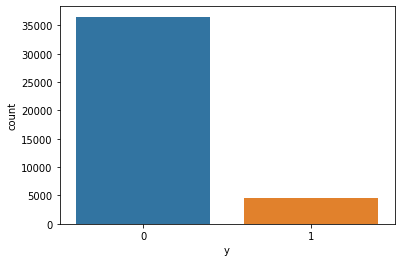

In [ ]:
#graphically represinting class imbalance
sns.countplot(x='y', data=X)
plt.show()

Here it can be seen that there is a considerable class imbalance in the dataset. To handle the class imbalance I will apply SMOTE later.

# Data Preprocessing

In [ ]:
#get number of rows in the dataset
rows = X.shape[0]
print(rows)

41188


In [ ]:
#check for duplicate records
duplicates = X.duplicated()
print(duplicates.any())

True


There are duplicate records so let's see how many records are there and drop them.

In [ ]:
#count the number of duplicated records
duplicates = X.duplicated().sum()
duplicates

12

In [ ]:
#drop duplicates
X.drop_duplicates(inplace=True)

In [ ]:
#check any missing values are there 
X.isnull().values.any()

False

If there is any missing value in any of the columns this will return True. But here it returns False and it means there are not any missing values in the dataset.

Although there are not any missing values when we take a look at the dataset, there are values as 'unknown'. Those values are not detected by the above functions. But we do not remove them since they may be recorded as unknown due to some valid reason although we do not know for sure.

First the duration column is dropped since it is said that the attribute highly affects the y value of the dataset.

In [ ]:
X.drop(['duration'], inplace=True, axis = 1)

# Handling Outliers

Outliers will be checked for all numerical columns.

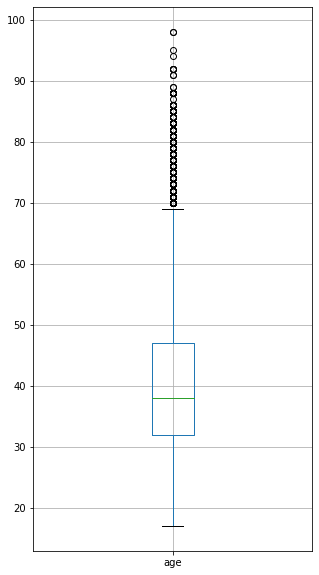

In [ ]:
age_df = pd.DataFrame(X["age"])
age_df.boxplot(figsize=(5,10))

age column does not have outliers.

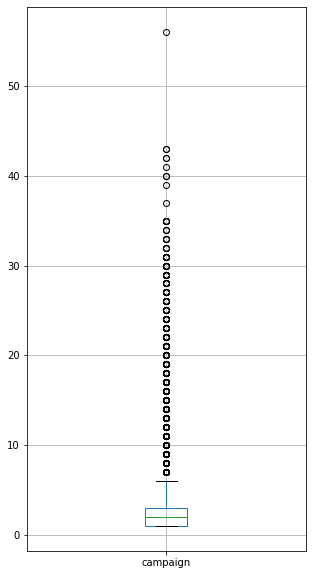

In [ ]:
campaign_df = pd.DataFrame(X["campaign"])
campaign_df.boxplot(figsize=(5,10))

There is one outlier and it will be removed in the next step.

Before Shape: (41176, 20)
After Shape: (41175, 20)


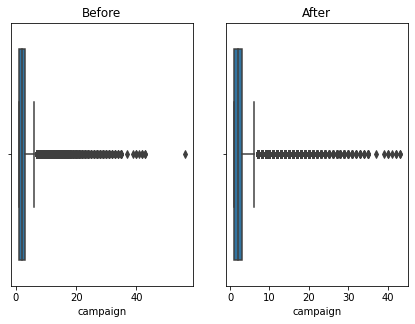

In [ ]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:", X.shape)
#remove outliers that is more than 50
X_df =X[X['campaign']<50]
print("After Shape:", X_df.shape)

sns.boxplot(X['campaign'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(X_df['campaign'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

X=X_df;
X=X.reset_index(drop=True)

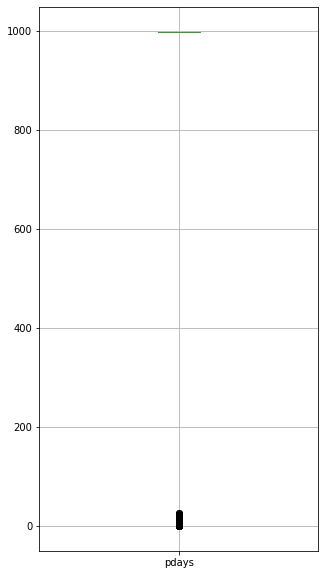

In [ ]:
pdays_df = pd.DataFrame(X["pdays"])
pdays_df.boxplot(figsize=(5,10))

In pdays many data values are 999 but it is not appropriate to remove the data values closer to 0 since there are a considerable amount of data with values closer to 0. So they cannot be considered as outliers.

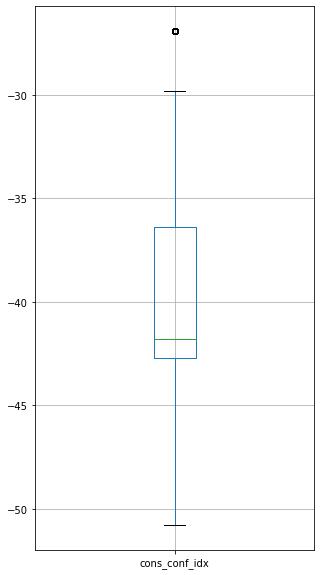

In [ ]:
cons_conf_idx_df = pd.DataFrame(X["cons_conf_idx"])
cons_conf_idx_df.boxplot(figsize=(5,10))

In [ ]:
#count how may reocrds have cons_conf_idx value more than -27
X[X['cons_conf_idx'] > -27].shape[0]

446

Since it has 446 values in that separate region they cannot be considered as outliers.

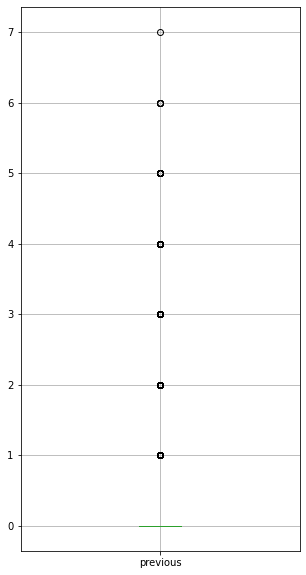

In [ ]:
previous_df = pd.DataFrame(X["previous"])
previous_df.boxplot(figsize=(5,10))

In [ ]:
X[X['previous'] == 7].shape[0]

1

There is only one outlier and it is dropped in the next step.

Before Shape: (41175, 20)
After Shape: (41174, 20)


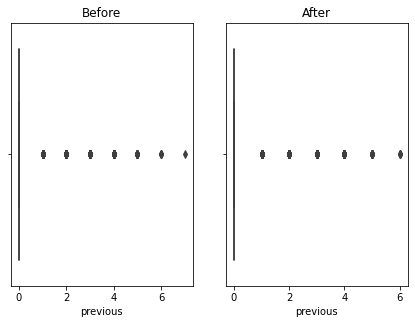

In [ ]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:", X.shape)
X_df =X[X['previous']<7]
print("After Shape:", X_df.shape)

sns.boxplot(X['previous'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(X_df['previous'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

X=X_df;
X=X.reset_index(drop=True)

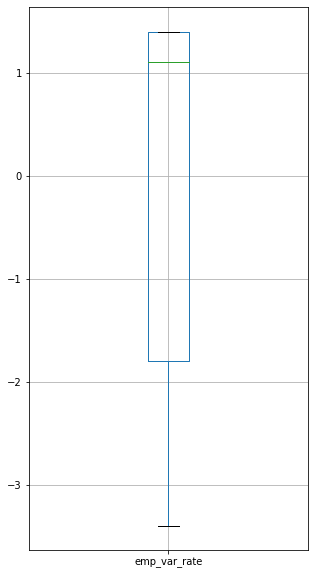

In [ ]:
emp_var_rate_df = pd.DataFrame(X["emp_var_rate"])
emp_var_rate_df.boxplot(figsize=(5,10))

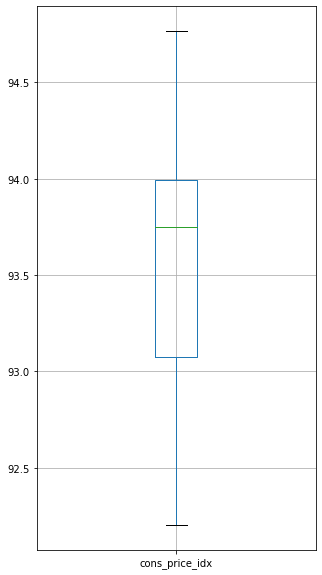

In [ ]:
cons_price_idx_df = pd.DataFrame(X["cons_price_idx"])
cons_price_idx_df.boxplot(figsize=(5,10))

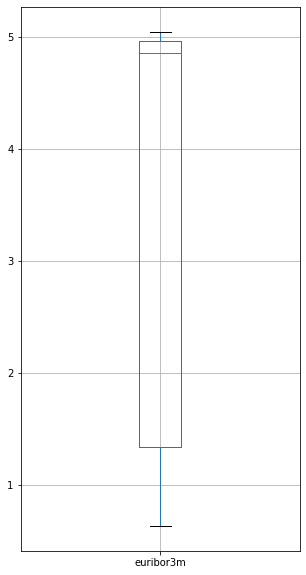

In [ ]:
euribor3m_df = pd.DataFrame(X["euribor3m"])
euribor3m_df.boxplot(figsize=(5,10))

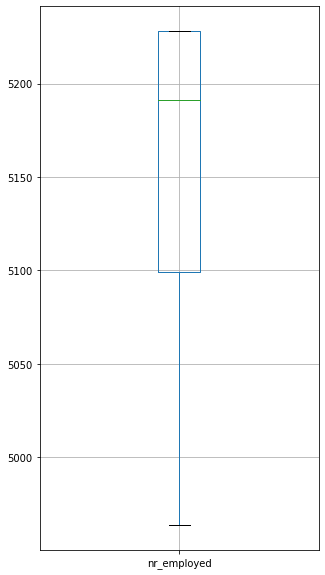

In [ ]:
nr_employed_df = pd.DataFrame(X["nr_employed"])
nr_employed_df.boxplot(figsize=(5,10))

For above 5 columns; previous, emp_var_rate, cons_price_idx, euribor3m, nr_employed there are no outliers.

Now all the outliers are handled in numerical columns. 

# Feature Encoding

In [ ]:
X1 = X.copy()

We need to identify the categorical columns before applying feature encoding.

In [ ]:
cat_df = X1.select_dtypes(include = np.object)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41174 entries, 0 to 41173
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41174 non-null  object
 1   marital      41174 non-null  object
 2   education    41174 non-null  object
 3   default      41174 non-null  object
 4   housing      41174 non-null  object
 5   loan         41174 non-null  object
 6   contact      41174 non-null  object
 7   month        41174 non-null  object
 8   day_of_week  41174 non-null  object
 9   poutcome     41174 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


Let's check how many unique values are included in those columns.

In [ ]:
cat_df.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

We apply label encoding to all the categorical columns. But education column should have the rank preserved.

In [ ]:
#get the unique values of education column
X1.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We know that there is an order in educational qualificaions. So education column can be considered as ordinal.
I have provided the least value 0 for unknown values and the highest value 7 for university degree. Other values also are mapped in order.

In [ ]:
scale_mapper = {"unknown":0, "illiterate":1, "basic.4y":2, "basic.6y":3, "basic.9y":4, "high.school":5, "professional.course":6, "university.degree":7}
X1["education"] = X1["education"].replace(scale_mapper)
X1.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,2,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,0,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,7,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,5,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,2,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,2,no,yes,no,cellular,jul,tue,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,2,no,yes,no,cellular,may,thu,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,4,no,yes,no,cellular,may,fri,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,7,no,no,no,cellular,jun,mon,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,2,no,yes,no,cellular,apr,thu,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


All other categorical columns can be encoded using label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#column list to apply label encoding 
columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for element in columns:
        encoder = LabelEncoder()
        encoder.fit(X1[element])
        X1[element] = encoder.transform(X1[element])

X1.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,2,1,2,0,0,1,2,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,0,0,0,0,0,7,0,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,7,0,2,0,0,4,2,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,5,0,0,0,0,0,0,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,2,0,2,0,0,1,0,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,4,0,2,0,2,0,0,3,3,8,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0
6,37,1,1,2,0,2,0,0,6,2,1,999,0,1,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,1,0,4,0,2,0,0,6,0,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,0,1,7,0,0,0,0,4,1,1,3,1,2,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,1,2,2,0,2,0,0,0,2,2,999,1,0,-1.8,93.075,-47.1,1.410,5099.1,0


# Transformations

In [ ]:
X2 = X1.copy()

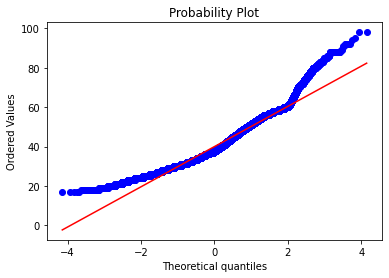

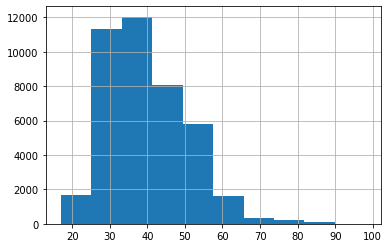

In [ ]:
#create and show the plot
stats.probplot(X2["age"], dist="norm", plot=plt)
plt.show()
X2["age"].hist()

It can be seen that the age is right skewed. It should be transformed using square root transformation to reduce the skewness.

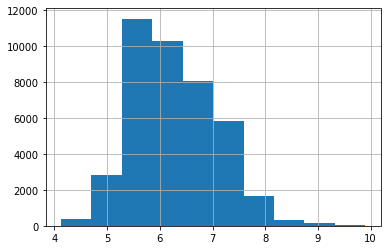

In [ ]:
from sklearn.preprocessing import FunctionTransformer

logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['age'])
X2['age']=data_df

X2['age'].hist()

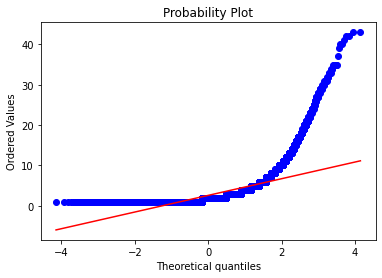

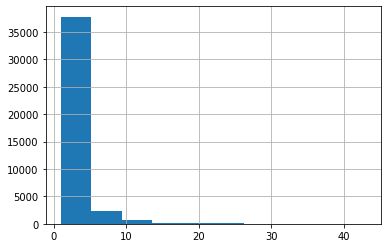

In [ ]:
stats.probplot(X2["campaign"], dist="norm", plot=plt)
plt.show()
X2["campaign"].hist()

campaign is right skewed. I should be transformed into normal distribution using square root transformer.

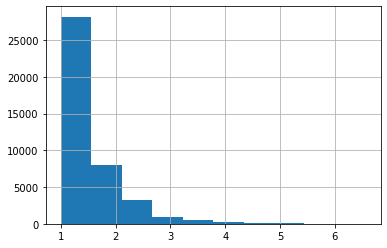

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['campaign'])
X2['campaign']=data_df

X2['campaign'].hist()

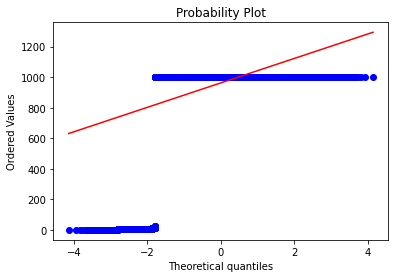

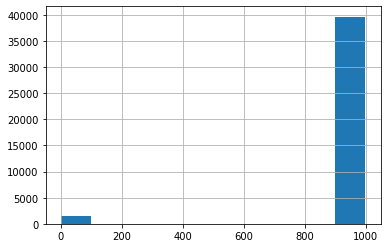

In [ ]:
stats.probplot(X2["pdays"], dist="norm", plot=plt)
plt.show()
X2["pdays"].hist()

I decided not to apply transformations for pdays since it is distrubuted only in 2 separate regions.

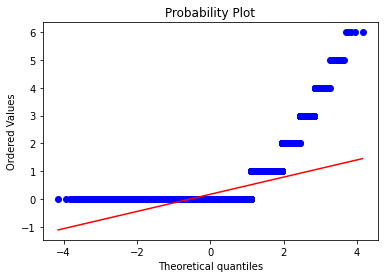

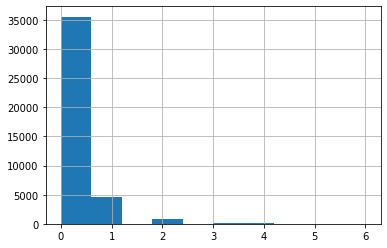

In [ ]:
stats.probplot(X2["previous"], dist="norm", plot=plt)
plt.show()
X2["previous"].hist()

previous is right skewed. Square root trnasformation should be applied.

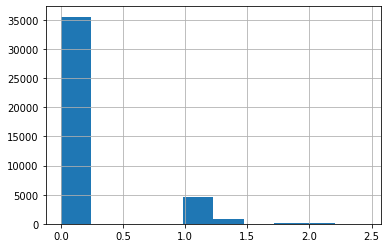

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['previous'])
X2['previous']=data_df

X2['previous'].hist()

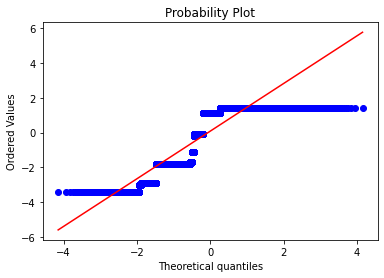

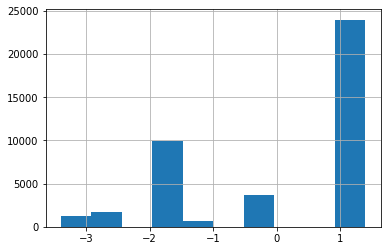

In [ ]:
stats.probplot(X2["emp_var_rate"], dist="norm", plot=plt)
plt.show()
X2["emp_var_rate"].hist()

emp_var_rate is left skewed. Square transformation should be applied to reduce the left skewness.

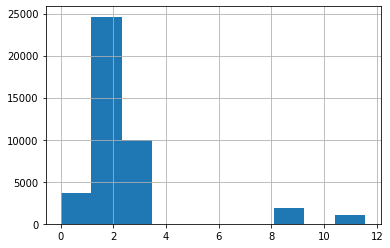

In [ ]:
exp_transformer = FunctionTransformer(lambda x: x ** 2)

data_df = exp_transformer.transform(X2['emp_var_rate'])
X2['emp_var_rate']=data_df

X2['emp_var_rate'].hist()

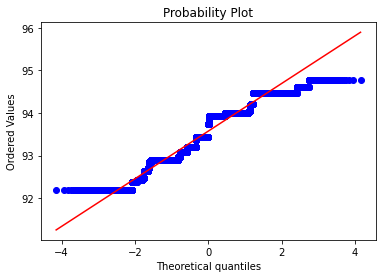

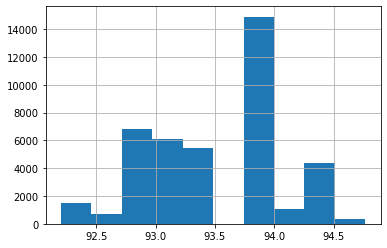

In [ ]:
stats.probplot(X2["cons_price_idx"], dist="norm", plot=plt)
plt.show()
X2["cons_price_idx"].hist()

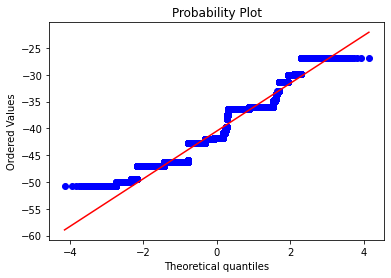

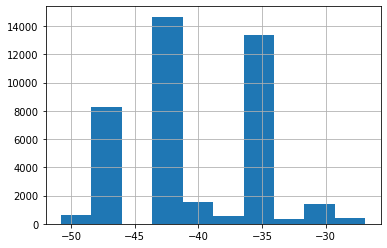

In [ ]:
stats.probplot(X2["cons_conf_idx"], dist="norm", plot=plt)
plt.show()
X2["cons_conf_idx"].hist()

Since cons_conf_idx does not show skewness, transformations are not needed.

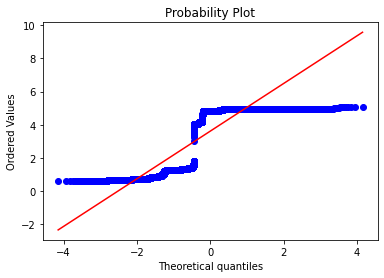

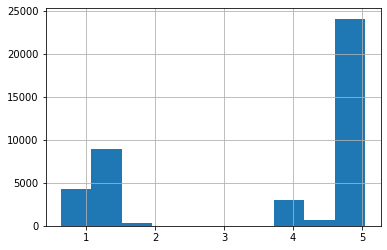

In [ ]:
stats.probplot(X2["euribor3m"], dist="norm", plot=plt)
plt.show()
X2["euribor3m"].hist()

I applied trnasformation to euribor3m before but removed it again since the histogram generated after transformation did not show much difference from the histogram for original data.

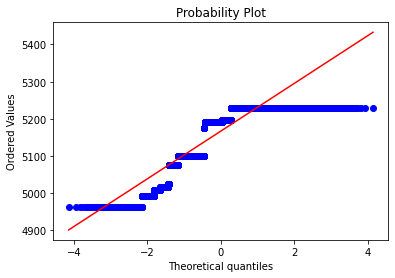

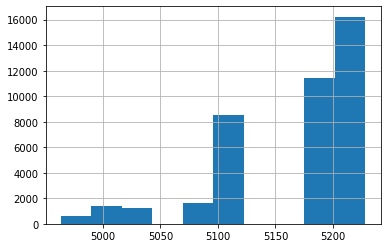

In [ ]:
stats.probplot(X2["nr_employed"], dist="norm", plot=plt)
plt.show()
X2["nr_employed"].hist()

nr_employed is left skewed. Square transformation should be applied to reduce the left skewness.

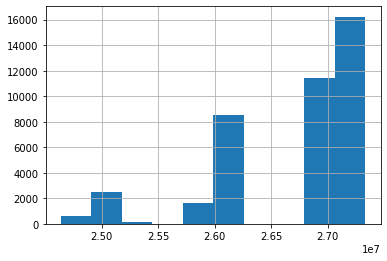

In [ ]:
exp_transformer = FunctionTransformer(lambda x: x ** 2)

data_df = exp_transformer.transform(X2['nr_employed'])
X2['nr_employed']=data_df

X2['nr_employed'].hist()

# Standardization

Standardization is applied only for numerical data. 

In [ ]:
X3 = X2.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X3[['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']].copy()

scaler = StandardScaler()
scaler.fit(cols)

scaled = scaler.transform(cols)
scaled_df = pd.DataFrame(scaled, columns = cols.columns)

In [ ]:
X3[['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']] = scaled_df

# Feature Extraction

Features with high and low significance can be identified by analyzing the significance matrix.

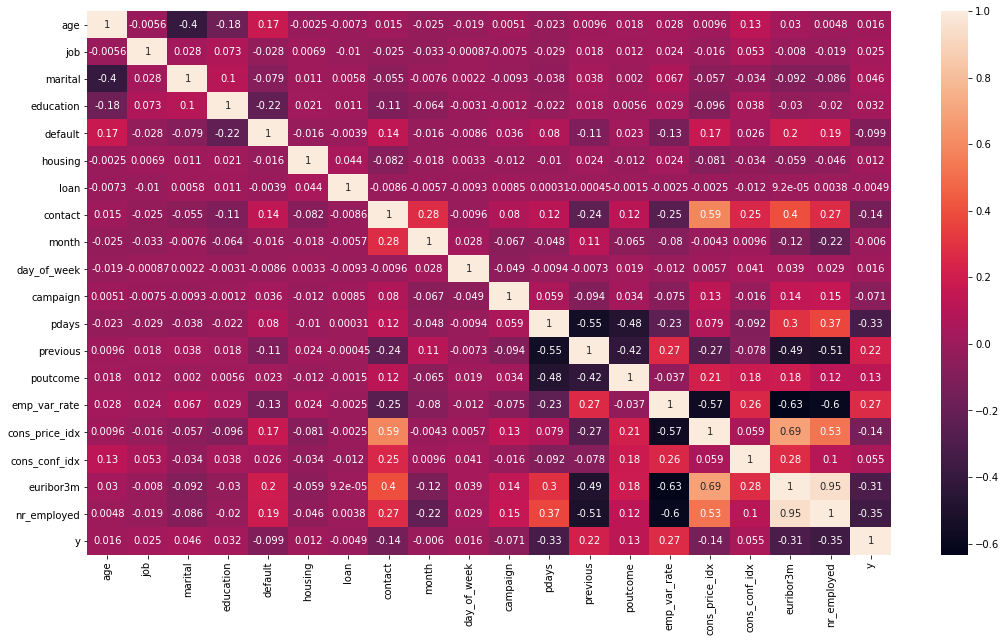

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(X3.corr(), annot = True);

When we consider the correlation between attributes we cannot see any considerably highly correlated attributes.
When we consider the significance there are some attributes with low significance.
I decided to drop attributes with low significance.

In [ ]:
X3 = X3.drop(['day_of_week', 'job', 'housing', 'loan'], axis = 1)

I decided to drop 4 attributes day_of_week, job, housing, and loan since then I could get a high precision in predictions than dropping other combinations of low significant attributes. 

# SMOTE

Class imbalance is handled with SMOTE technique.

In [ ]:
X4 = X3.copy()

First, the target variable 'y' should be separated. It is the y_true.

In [ ]:
y_true = X4['y']
X_dataset = X4.drop('y', axis=1)

Dataset should be splitted in 0.8 : 0.2 ratio.
Then SMOTE is applied to the training data; for both features and target.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_class_train, X_test, y_class_train, y_test = train_test_split(X_dataset, y_true, test_size=0.2, random_state=0)
columns = X_class_train.columns

data_X, data_y = os.fit_sample(X_class_train, y_class_train)

smoted_X = pd.DataFrame(data=data_X,columns=columns )
smoted_y= pd.DataFrame(data=data_y,columns=['y'])

When we graphically represent the classes of 'y' we can see the class imbalance is resolved.

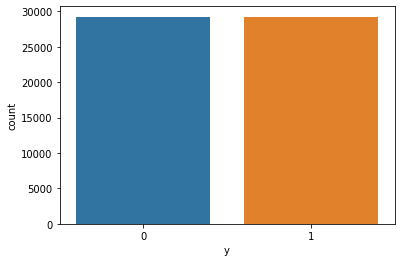

In [ ]:
sns.countplot(x='y', data=smoted_y)
plt.show()

X_train and y_train has the data without class imbalance. Testing data; X_test and y_test is separeted before we apply SMOTE. So testing data has original records.

In [ ]:
X_train = smoted_X
y_train = smoted_y

# PCA

In [ ]:
from sklearn.decomposition import PCA

#apply the PCA for feature for feature reduction
pca = PCA(n_components=9)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,age,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.255610,1.000000,5.0,0.0,1.000000,6.000000,0.410947,0.195381,-0.388130,1.0,-0.573893,0.722720,0.886576,0.711297,0.327823
1,-1.105774,2.000000,7.0,0.0,0.000000,7.000000,-0.777930,0.195381,-0.388130,1.0,-1.118563,-0.649054,-0.323556,0.262151,0.395092
2,1.248922,1.000000,6.0,1.0,0.000000,6.000000,1.229488,0.195381,-0.388130,1.0,0.347506,-1.179451,-1.231155,-1.318799,-0.948106
3,-0.341768,0.000000,5.0,0.0,0.000000,7.000000,-0.777930,0.195381,-0.388130,1.0,-1.118563,-0.649054,-0.323556,0.328456,0.395092
4,1.333866,0.000000,0.0,1.0,1.000000,4.000000,0.410947,0.195381,-0.388130,1.0,-0.233475,1.536455,-0.280337,0.770683,0.849372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58477,-1.969083,2.000000,5.0,0.0,0.000000,8.000000,-0.270067,-5.118204,2.191953,2.0,4.123881,-1.977636,2.939479,-1.663083,-2.061930
58478,-1.795942,1.521390,5.0,0.0,0.000000,8.000000,-0.777930,0.195381,-0.388130,1.0,4.123881,-1.977636,2.939479,-1.664064,-2.061930
58479,1.098349,1.000000,5.0,1.0,1.000000,3.251287,0.520297,0.195381,-0.388130,1.0,-0.233475,0.828892,-0.425951,0.758936,0.849372
58480,2.474573,1.000000,7.0,0.0,0.023424,3.000000,-0.120990,-5.086098,2.191953,2.0,0.188644,1.104536,0.043805,-1.576101,-2.411703


In [ ]:
pca.explained_variance_ratio_

array([0.28260584, 0.21861545, 0.15594677, 0.10720656, 0.06977807,
       0.0488312 , 0.0301696 , 0.02793135, 0.02621437])

When summing up the variance ratio of first 9 components the result is 0.96 approximately. So I decided to use 9 components for PCA.

# SVM with Kernel

rbf kernel is used. I tried with different C and gamma values. When C=1 and gamma=0.05, it produced a better result when compared with the results produced by other value combinations.

In [ ]:
from sklearn import svm

trainedsvm = svm.SVC(kernel='rbf', C=1, gamma=0.05).fit(PCA_X_train, y_train)
predictionsvm = trainedsvm.predict(PCA_X_test)

Confusion matrix is created to evaluate the performance of the classification model.

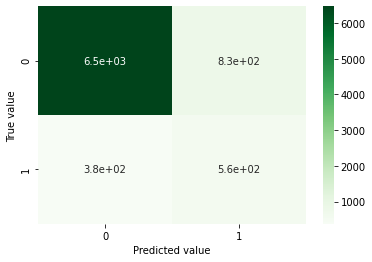

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,predictionsvm)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

*   True positives - 560
*   True negatives - 6500
*   False positives - 830
*   False negatives - 380

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictionsvm))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7294
           1       0.40      0.60      0.48       941

    accuracy                           0.85      8235
   macro avg       0.67      0.74      0.70      8235
weighted avg       0.88      0.85      0.86      8235



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision score: {}".format(precision_score(y_test,predictionsvm)))
print("Recall score: {}".format(recall_score(y_test,predictionsvm)))
print("F1 Score: {}".format(f1_score(y_test,predictionsvm)))

Precision score: 0.40330697340043137
Recall score: 0.5961742826780021
F1 Score: 0.4811320754716981


In [ ]:
print("Training set score: %f" % trainedsvm.score(PCA_X_train, y_train))
print("Test set score: %f" % trainedsvm.score(PCA_X_test, y_test))

Training set score: 0.748213
Test set score: 0.853066
